<a href="https://colab.research.google.com/github/Bhupathiadithya/Data-Analysis-using-python-new/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Original Scores ---
            Mathematics  Science  English
Student 1           78       85       72
Student 2           65       70       68
Student 3           88       82       75

--- Bonus Marks ---
            Mathematics  Science  English
Student 1            3        2        5
Student 2            5        4        0
Student 3            2        5        3

--- Final Scores (Before Penalty) ---
            Mathematics  Science  English
Student 1           81       87       77
Student 2           70       74       68
Student 3           90       87       78

--- Final Scores (After 5% Penalty) ---
            Mathematics  Science  English
Student 1        76.95    82.65    73.15
Student 2        66.50    70.30    64.60
Student 3        85.50    82.65    74.10

--- Transposed Final Scores (Subjects × Students) ---
              Student 1  Student 2  Student 3
Mathematics      76.95       66.5      85.50
Science          82.65       70.3      82.65
English          73.15 

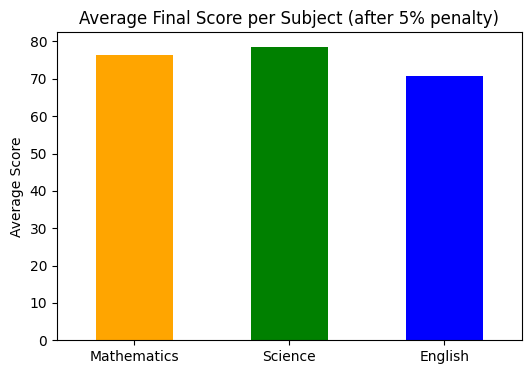

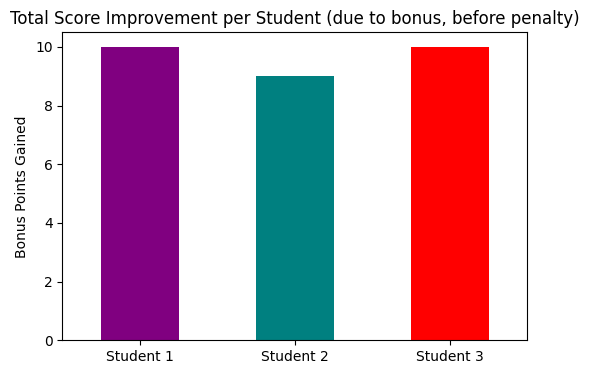

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------------------------
# 1. Original Score Matrix
# ----------------------------
subjects = ['Mathematics', 'Science', 'English']
students = ['Student 1', 'Student 2', 'Student 3']

original_scores = np.array([
    [78, 85, 72],   # Student 1
    [65, 70, 68],   # Student 2
    [88, 82, 75]    # Student 3
    ])

# ----------------------------
# 2. Bonus Marks Matrix
# ----------------------------
bonus_marks = np.array([
    [3, 2, 5],   # Student 1
    [5, 4, 0],   # Student 2
    [2, 5, 3]    # Student 3
    ])

# ----------------------------
# 3. Final Scores with Bonuses
# ----------------------------
final_before_penalty = original_scores + bonus_marks

# ----------------------------
# 4. Apply Penalty (5%)
# ----------------------------
penalty_factor = 0.95
final_after_penalty = np.round(final_before_penalty * penalty_factor, 2)

# Convert to DataFrames for readability
df_original = pd.DataFrame(original_scores, index=students, columns=subjects)
df_bonus = pd.DataFrame(bonus_marks, index=students, columns=subjects)
df_final_before = pd.DataFrame(final_before_penalty, index=students, columns=subjects)
df_final_after = pd.DataFrame(final_after_penalty, index=students, columns=subjects)

print("\n--- Original Scores ---\n", df_original)
print("\n--- Bonus Marks ---\n", df_bonus)
print("\n--- Final Scores (Before Penalty) ---\n", df_final_before)
print("\n--- Final Scores (After 5% Penalty) ---\n", df_final_after)

# ----------------------------
# 5. Transpose Final Scores Matrix
# ----------------------------
df_transposed = df_final_after.T
print("\n--- Transposed Final Scores (Subjects × Students) ---\n", df_transposed)

# ----------------------------
# 6. Interpret the Results
# ----------------------------
# Subject averages
subject_averages = df_transposed.mean(axis=1).round(2)
best_subject = subject_averages.idxmax()
best_subject_avg = subject_averages.max()

# Student improvement due to bonus (before penalty)
improvement_due_to_bonus = (df_final_before.sum(axis=1) - df_original.sum(axis=1)).round(2)
best_student_bonus = improvement_due_to_bonus.idxmax()
best_student_bonus_value = improvement_due_to_bonus.max()

# Percent improvements (before penalty)
percent_improvement = ((improvement_due_to_bonus / df_original.sum(axis=1)) * 100).round(2)

print("\n--- Insights ---")
print("Subject averages (final after penalty):\n", subject_averages)
print(f"\nHighest-average subject: {best_subject} (Average = {best_subject_avg})")
print("\nImprovement due to bonus marks per student:\n", improvement_due_to_bonus)
print(f"\nStudent who improved the most: {best_student_bonus} (+{best_student_bonus_value} points)")
print("\nPercent improvement per student (before penalty):\n", percent_improvement)

# ----------------------------
# 7. Visualization
# ----------------------------
plt.figure(figsize=(6,4))
subject_averages.plot(kind='bar', color=['orange','green','blue'])
plt.title("Average Final Score per Subject (after 5% penalty)")
plt.ylabel("Average Score")
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(6,4))
improvement_due_to_bonus.plot(kind='bar', color=['purple','teal','red'])
plt.title("Total Score Improvement per Student (due to bonus, before penalty)")
plt.ylabel("Bonus Points Gained")
plt.xticks(rotation=0)
plt.show()